In [1]:
!pip install Lifetimes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.4 MB/s eta 0:00:00


In [2]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from lifetimes import BetaGeoBetaBinomFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
from lifetimes.plotting import plot_frequency_recency_matrix


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data/online_retail_II copy.csv')

In [4]:
#Cleaning functions

def outlier_thresholds(dataframe, variable):
    q1 = dataframe[variable].quantile(0.01)
    q3 = dataframe[variable].quantile(0.99)
    iqr = q3 - q1
    up_limit = q3 + 1.5 * iqr
    low_limit = q1 - 1.5 * iqr
    return low_limit, up_limit

# To replace the outliers with thresholds
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

# To clean our data for the processes ahead
def prepare_data(dataframe):
    dataframe = dataframe[~dataframe["Invoice"].str.contains("C", na=False)]
    dataframe = dataframe[(dataframe["Quantity"] > 0)]
    dataframe = dataframe[(dataframe["Price"] > 0)]
    dataframe.dropna(inplace=True)
    for column in dataframe.columns:
        if (column != "Customer_ID") and (dataframe[column].dtypes in ["int64", "float64", "int32", "float32"]):
            replace_with_thresholds(dataframe, column)
    return dataframe

In [ ]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [5]:
df = prepare_data(df)

In [6]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [6]:
df.info()

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407664 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      407664 non-null  object 
 1   StockCode    407664 non-null  object 
 2   Description  407664 non-null  object 
 3   Quantity     407664 non-null  float64
 4   InvoiceDate  407664 non-null  object 
 5   Price        407664 non-null  float64
 6   Customer ID  407664 non-null  float64
 7   Country      407664 non-null  object 
dtypes: float64(3), object(5)
memory usage: 28.0+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 407664 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407664 non-null  object        
 1   StockCode    407664 non-null  object        
 2   Description  407664 non-null  object        
 3   Quantity     407664 non-null  float64     

In [ ]:

analysis_date = dt.datetime(2010, 12, 11)

(analysis_date - df["InvoiceDate"].min()).days

375

In [ ]:
df['week'] = df['InvoiceDate'].dt.week

In [ ]:
df['month'] = df['InvoiceDate'].dt.month
df['quarter'] = df['InvoiceDate'].dt.quarter

In [ ]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,week,month,quarter
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01,6.95,13085.0,United Kingdom,49,12,4
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01,6.75,13085.0,United Kingdom,49,12,4
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01,6.75,13085.0,United Kingdom,49,12,4
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01,2.10,13085.0,United Kingdom,49,12,4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01,1.25,13085.0,United Kingdom,49,12,4


In [ ]:
clv_df[clv_df['Customer ID'] == 12346]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,week,month,quarter,TotalPrice
27994,491725,TEST001,This is a test product.,10.0,2009-12-14,4.50,12346.0,United Kingdom,51,12,4,45.00
28251,491742,TEST001,This is a test product.,5.0,2009-12-14,4.50,12346.0,United Kingdom,51,12,4,22.50
28254,491744,TEST001,This is a test product.,5.0,2009-12-14,4.50,12346.0,United Kingdom,51,12,4,22.50
39398,492718,TEST001,This is a test product.,5.0,2009-12-18,4.50,12346.0,United Kingdom,51,12,4,22.50
39411,492722,TEST002,This is a test product.,1.0,2009-12-18,1.00,12346.0,United Kingdom,51,12,4,1.00
45228,493410,TEST001,This is a test product.,5.0,2010-01-04,4.50,12346.0,United Kingdom,1,1,1,22.50
45230,493412,TEST001,This is a test product.,5.0,2010-01-04,4.50,12346.0,United Kingdom,1,1,1,22.50
56117,494450,TEST001,This is a test product.,5.0,2010-01-14,4.50,12346.0,United Kingdom,2,1,1,22.50
66084,495295,TEST001,This is a test product.,5.0,2010-01-22,4.50,12346.0,United Kingdom,3,1,1,22.50
107800,499763,20682,RED SPOTTY CHILDS UMBRELLA,1.0,2010-03-02,3.25,12346.0,United Kingdom,9,3,1,3.25


In [ ]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [ ]:
clv_df = df.groupby('Customer ID').agg({'InvoiceDate': [lambda date: (date.max() - date.min()).days/7, lambda date: (analysis_date - date.min()).days/7, lambda date: date.dt.week.nunique()], 'TotalPrice': lambda money: money.mean()})


In [ ]:
clv_df.head(5)

InvoiceDate                       TotalPrice
             <lambda_0> <lambda_1> <lambda_2>   <lambda>
Customer ID                                             
12346.0       28.000000  51.714286          6  11.298788
12347.0        5.285714   5.857143          2  18.638310
12348.0        0.000000  10.714286          1  11.108000
12349.0       26.000000  32.285714          3  22.500196
12351.0        0.000000   1.714286          1  14.330000

In [ ]:
clv_df.head(5)

InvoiceDate                        Invoice TotalPrice
             <lambda_0> <lambda_1> <lambda_2> <lambda>   <lambda>
Customer ID                                                      
12346.0             196        362          6       11  11.298788
12347.0              37         41          2        2  18.638310
12348.0               0         75          1        1  11.108000
12349.0             182        226          3        3  22.500196
12351.0               0         12          1        1  14.330000

In [7]:
#get Frequency, Recency, T_weekly, Monetary_CLV_Avg
analysis_date = dt.datetime(2010, 12, 11)
df["TotalPrice"] = df["Quantity"] * df["Price"]

#weekly
#clv_df = df.groupby('Customer ID').agg({'InvoiceDate': [lambda date: (date.max() - date.min()).days/7, lambda date: (analysis_date - date.min()).days/7, lambda date: date.dt.week.nunique() - 1], 'TotalPrice': lambda money: money.mean()})
#clv_df.columns = clv_df.columns.droplevel(0)
#clv_df.columns = ['recency_clv_weekly', 'T_weekly', 'frequency', 'monetary_clv_avg']

#monthly
#clv_df = df.groupby('Customer ID').agg({'InvoiceDate': [lambda date: (date.max() - date.min()).days/30, lambda date: (analysis_date - date.min()).days/30, lambda date: date.dt.month.nunique() - 1], 'TotalPrice': lambda money: money.mean()})

#Daily
clv_df = df.groupby('Customer ID').agg({'InvoiceDate': [lambda date: (date.max() - date.min()).days, lambda date: (analysis_date - date.min()).days, lambda date: date.nunique() - 1], 'TotalPrice': lambda money: money.mean()})
clv_df.columns = clv_df.columns.droplevel(0)
clv_df.columns = ['recency_clv_Daily', 'T_Daily', 'frequency', 'monetary_clv_avg']
#clv_df["monetary_clv_avg"] = clv_df["monetary_clv_avg"] / clv_df["frequency"]

# only include customers with more than one purchase
clv_df = clv_df[(clv_df['frequency'] > 0)]
#clv_df["recency_clv_weekly"] = clv_df["recency_clv_weekly"] / 7
#clv_df["T_weekly"] = clv_df["T_weekly"] / 7

In [8]:
#clv_df = clv_df[(clv_df['frequency'] > 1)]
clv_df.head(5)

clv_df = clv_df.sort_values(by=['frequency','recency_clv_Daily'], ascending=False)

clv_df.head(5)

,recency_clv_Daily,T_Daily,frequency,monetary_clv_avg
Customer ID,,,,
14911.0,373,375,127,25.723628
15311.0,373,375,109,27.200689
12748.0,370,372,95,7.721447
14606.0,370,373,94,4.824977
17841.0,372,374,84,5.916187


In [12]:
clv_df.describe()

,recency_clv_Daily,T_Daily,frequency,monetary_clv_avg
count,1975.000000,1975.000000,1975.000000,1975.000000
mean,244.155443,290.867848,5.996962,28.856693
std,96.650655,87.531944,7.851199,46.383783
min,4.000000,18.000000,2.000000,1.993684
25%,172.500000,247.000000,2.000000,11.378580
50%,257.000000,317.000000,4.000000,17.972791
75%,334.000000,366.000000,7.000000,26.421590
max,373.000000,375.000000,127.000000,626.478750


In [18]:
clv_df.head()

,recency_clv_Daily,T_Daily,frequency,monetary_clv_avg
Customer ID,,,,
14911.0,373,375,127,25.723628
15311.0,373,375,109,27.200689
12748.0,370,372,95,7.721447
14606.0,370,373,94,4.824977
17841.0,372,374,84,5.916187


In [11]:
from datetime import timedelta
import lifetimes
from lifetimes import utils



# set the last transaction date as the end point for this historical dataset
current_date = df['InvoiceDate'].max()

# define end of calibration period
holdout_days = 90
calibration_end_date = current_date - timedelta(days = holdout_days)

df_h = lifetimes.utils.calibration_and_holdout_data(df,
    customer_id_col='Customer ID',
    datetime_col='InvoiceDate',
    observation_period_end = current_date,
    calibration_period_end=calibration_end_date,
    freq='D')

df_h = df_h[(df_h['frequency_cal'] > 0)]

In [25]:
df_h.head(10)

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
Customer ID,,,,,
12346.0,6.0,196.0,270.0,0.0,90.0
12349.0,1.0,19.0,134.0,1.0,90.0
12355.0,0.0,0.0,112.0,0.0,90.0
12358.0,1.0,181.0,276.0,1.0,90.0
12359.0,4.0,199.0,279.0,1.0,90.0
12360.0,2.0,92.0,200.0,2.0,90.0
12361.0,2.0,220.0,227.0,0.0,90.0
12362.0,0.0,0.0,283.0,0.0,90.0
12366.0,0.0,0.0,178.0,0.0,90.0


In [30]:
df_h.loc[[12346]]

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
Customer ID,,,,,
12346.0,6.0,196.0,270.0,0.0,90.0


In [38]:
#consider only which has atleast 1 repeat purchase
df_h = df_h[(df_h['frequency_cal'] > 0)]

In [49]:
# work with calibration & holdout dataset for model fitting
from lifetimes import BetaGeoFitter
model = BetaGeoFitter(penalizer_coef=0.9975590906220992)
model.fit( df_h['frequency_cal'], df_h['recency_cal'], df_h['T_cal'])

<lifetimes.BetaGeoFitter: fitted with 2024 subjects, a: 0.00, alpha: 23.20, b: 0.02, r: 0.45>

In [51]:
frequency_holdout_actual = df_h['frequency_holdout']
frequency_holdout_predicted = model.predict(df_h['duration_holdout'], df_h['frequency_cal'], df_h['recency_cal'], df_h['T_cal'])
mse = score_model(frequency_holdout_actual, frequency_holdout_predicted, 'mse')

print('MSE: {0}'.format(mse))

MSE: 3.279974248743886


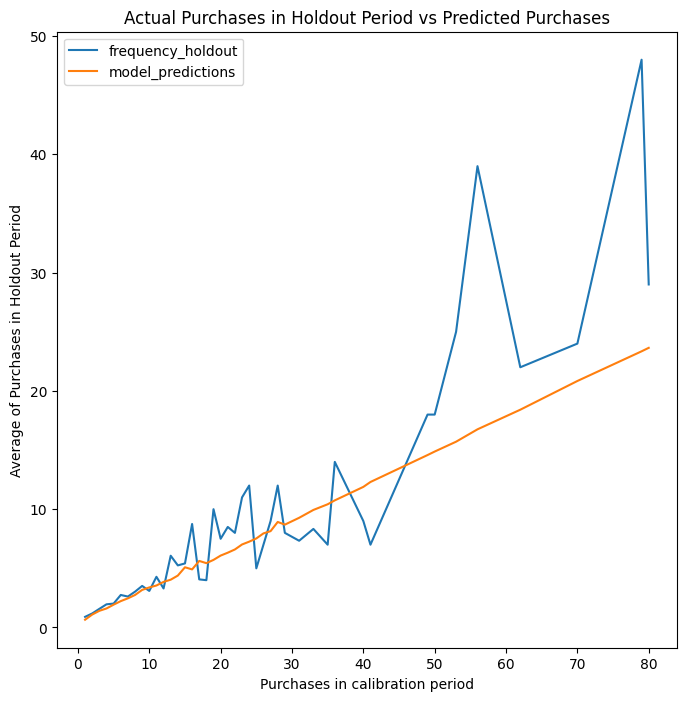

In [52]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

plot_calibration_purchases_vs_holdout_purchases(
  model,
  df_h,
  n=90,
  **{'figsize':(8,8)}
  )

display()

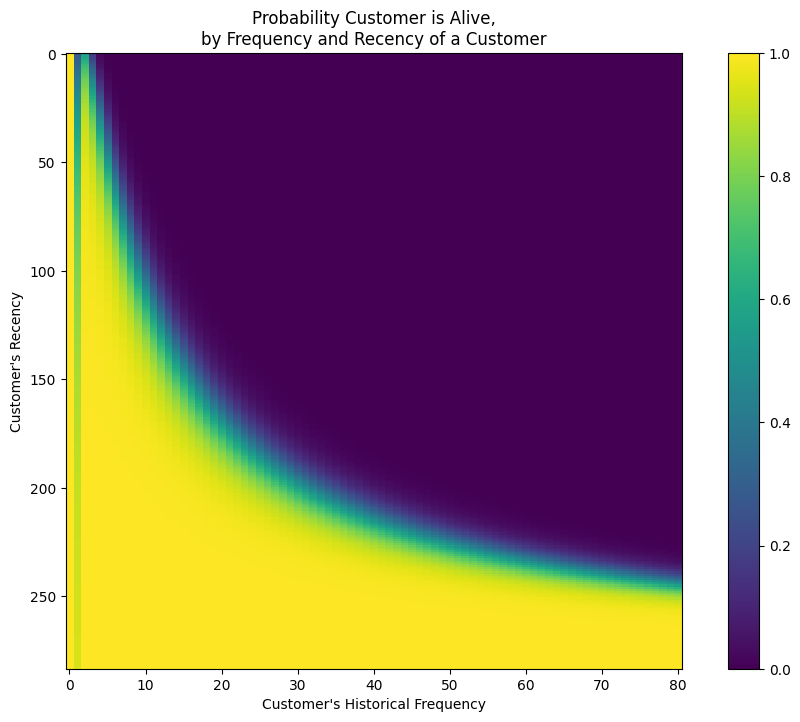

In [53]:
from lifetimes.plotting import plot_probability_alive_matrix

# set figure size
plt.subplots(figsize=(12, 8))

plot_probability_alive_matrix(model)

display()

In [55]:
clv_df['purchases_next30days']=(
  model.conditional_expected_number_of_purchases_up_to_time(
    30,
    clv_df['frequency'],
    clv_df['recency_clv_Daily'],
    clv_df['T_Daily']
    )
  )

clv_df.head(10)

,recency_clv_Daily,T_Daily,frequency,monetary_clv_avg,purchases_next30days
Customer ID,,,,,
14911.0,373,375,127,25.723628,9.601472
15311.0,373,375,109,27.200689,8.245455
12748.0,370,372,95,7.721447,7.245357
14606.0,370,373,94,4.824977,7.151309
17841.0,372,374,84,5.916187,6.378113
14156.0,367,375,78,69.017458,5.909712
14527.0,372,374,68,11.105471,5.169728
13089.0,369,374,67,37.507791,5.094099
17377.0,372,374,50,10.470169,3.810293


In [56]:
clv_df['prob alive']=(
  model.conditional_probability_alive(
    clv_df['frequency'],
    clv_df['recency_clv_Daily'],
    clv_df['T_Daily']
    )
  )

clv_df.head(10)

,recency_clv_Daily,T_Daily,frequency,monetary_clv_avg,purchases_next30days,prob alive
Customer ID,,,,,,
14911.0,373,375,127,25.723628,9.601472,0.999978
15311.0,373,375,109,27.200689,8.245455,0.999977
12748.0,370,372,95,7.721447,7.245357,0.999975
14606.0,370,373,94,4.824977,7.151309,0.999968
17841.0,372,374,84,5.916187,6.378113,0.999973
14156.0,367,375,78,69.017458,5.909712,0.999908
14527.0,372,374,68,11.105471,5.169728,0.999970
13089.0,369,374,67,37.507791,5.094099,0.999949
17377.0,372,374,50,10.470169,3.810293,0.999962


In [14]:
#find accuracy of model

import numpy as np

def score_model(actuals, predicted, metric='mse'):
  # make sure metric name is lower case
  metric = metric.lower()

  # Mean Squared Error and Root Mean Squared Error
  if metric=='mse' or metric=='rmse':
    val = np.sum(np.square(actuals-predicted))/actuals.shape[0]
    if metric=='rmse':
        val = np.sqrt(val)

  # Mean Absolute Error
  elif metric=='mae':
    val = np.sum(np.abs(actuals-predicted))/actuals.shape[0]

  else:
    val = None

  return val

# score the model
#print('MSE: {0}'.format(score_model(frequency_holdout_actual, frequency_holdout_predicted, 'mse')))

In [17]:
from lifetimes import BetaGeoFitter
from lifetimes import ParetoNBDFitter

In [27]:
from hyperopt import hp, fmin, tpe, rand, SparkTrials, STATUS_OK, STATUS_FAIL, space_eval

# define search space
search_space = hp.choice('model_type',[
                  {'type':'Pareto/NBD', 'l2':hp.uniform('pareto_nbd_l2', 0.0, 1.0)},
                  {'type':'BG/NBD'    , 'l2':hp.uniform('bg_nbd_l2', 0.0, 1.0)}
                  ]
                )

# define function for model evaluation
def evaluate_model(params):

  # accesss replicated input_pd dataframe
  data = df_h

  # retrieve incoming parameters
  model_type = params['type']
  l2_reg = params['l2']

  # instantiate and configure the model
  if model_type == 'BG/NBD':
    model = BetaGeoFitter(penalizer_coef=l2_reg)
  elif model_type == 'Pareto/NBD':
    model = ParetoNBDFitter(penalizer_coef=l2_reg)
  else:
    return {'loss': None, 'status': STATUS_FAIL}

  # fit the model
  model.fit(data['frequency_cal'], data['recency_cal'], data['T_cal'])

  # evaluate the model
  frequency_holdout_actual = data['frequency_holdout']
  frequency_holdout_predicted = model.predict(data['duration_holdout'], data['frequency_cal'], data['recency_cal'], data['T_cal'])
  mse = score_model(frequency_holdout_actual, frequency_holdout_predicted, 'mse')

  # return score and status
  return {'loss': mse, 'status': STATUS_OK}



In [15]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.0 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=databricks_cli-0.17.7-py3-none-any.whl size=143860 sha256=618eef1a2316922932e600aba06fd5232e0bcf3890bdd56887e605e822f9a5f3
  Stored in directory: /root/.cache/pip/wheels/ae/63/93/5402c1a09c1868a59d0b05013484e07af97a9d7b3dbd5bd39a
Successfully built databricks-cli


In [28]:
import mlflow
from hyperopt import Trials

# replicate input_pd dataframe to workers in Spark cluster
#inputs = sc.broadcast(clv_df)

# configure hyperopt settings to distribute to all executors on workers
#spark_trials = SparkTrials(parallelism=2)

# select optimization algorithm
algo = tpe.suggest

# perform hyperparameter tuning (logging iterations to mlflow)
trials = Trials()
argmin = fmin(
  fn=evaluate_model,
  space=search_space,
  algo=algo,
  max_evals=100
 ,trials=trials
  )

#print ('trials:')
#for trial in trials.trials[:2]:
#    print (trial)

# release the broadcast dataset
#inputs.unpersist()

  7%|▋         | 7/100 [00:02<00:40,  2.28trial/s, best loss: 3.2837328496120364]

ERROR:hyperopt.fmin:job exception: Cannot apply ufunc <ufunc 'hyp2f1'> to mixed DataFrame and Series inputs.


  7%|▋         | 7/100 [00:04<01:04,  1.43trial/s, best loss: 3.2837328496120364]


NotImplementedError: ignored

In [44]:
params = space_eval(search_space, argmin)
model_type = params['type']
l2_reg = params['l2']



NameError: ignored

In [ ]:
# get hyperparameter settings
params = space_eval(search_space, argmin)
model_type = params['type']
l2_reg = params['l2']

# instantiate and configure model
if model_type == 'BG/NBD':
  model = BetaGeoFitter(penalizer_coef=l2_reg)
elif model_type == 'Pareto/NBD':
  model = ParetoNBDFitter(penalizer_coef=l2_reg)
else:
  raise 'Unrecognized model type'

# train the model
model.fit(input_pd['frequency_cal'], input_pd['recency_cal'], input_pd['T_cal'])

In [ ]:
frequency_holdout_actual = input_pd['frequency_holdout']
frequency_holdout_predicted = model.predict(input_pd['duration_holdout'], input_pd['frequency_cal'], input_pd['recency_cal'], input_pd['T_cal'])
mse = score_model(frequency_holdout_actual, frequency_holdout_predicted, 'mse')

print('MSE: {0}'.format(mse))

In [ ]:
bbf = BetaGeoBetaBinomFitter(penalizer_coef=0.01)

bbf.fit(clv_df['frequency'],
        clv_df['recency_clv_weekly'],
        clv_df['T_weekly'])

<lifetimes.BetaGeoBetaBinomFitter: fitted with 1953 subjects, alpha: 0.85, beta: 3.59, delta: 0.41, gamma: 0.00>

In [ ]:
print(bbf)



<lifetimes.BetaGeoBetaBinomFitter: fitted with 4312 subjects, alpha: 0.39, beta: 2.77, delta: 0.25, gamma: 0.00>


In [ ]:
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.001)

bgf.fit(clv_df['frequency'],
        clv_df['recency_clv_weekly'],
        clv_df['T_weekly'])

<lifetimes.BetaGeoFitter: fitted with 1953 subjects, a: 0.00, alpha: 21.78, b: 0.00, r: 2.92>

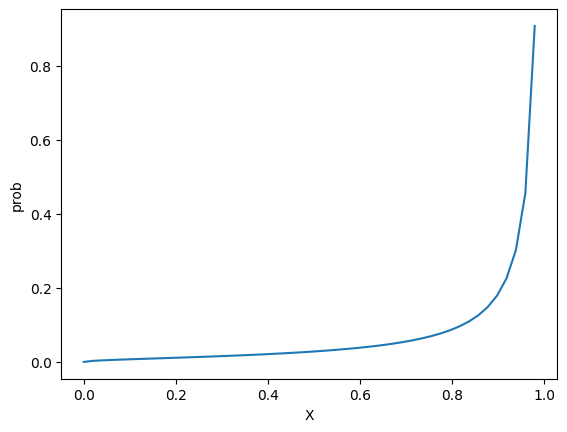

In [ ]:
import numpy as np
from scipy.stats import beta

x = np.linspace(0,1)
y = beta.pdf(x, 1.5, 0.02)

plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('prob')

d = plt
d.show()

<Axes: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

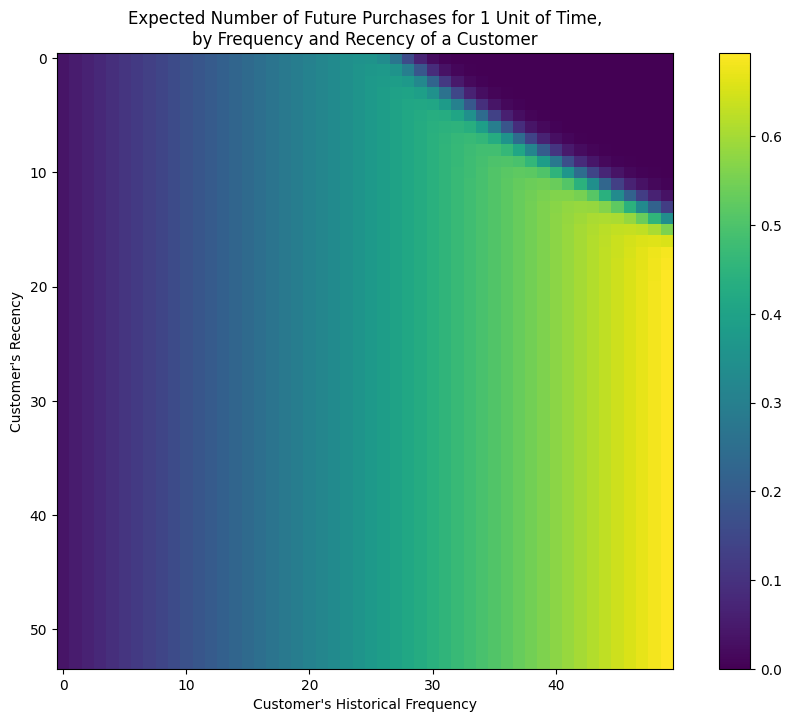

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)